### Data Description

- id:  Unique ID for each home sold
- date: Date of the home sale
- price: Price of each home sold
- bedrooms: Number of bedrooms
- bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
- sqft_living: Square footage of the apartments interior living space
- sqft_lot: Square footage of the land space
- floors: Number of floors
- waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
- view: An index from 0 to 4 of how good the view of the property was
- condition: An index from 1 to 5 on the condition of the apartment,
- grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
- sqft_above: The square footage of the interior housing space that is above ground level
- sqft_basement: The square footage of the interior housing space that is below ground level
- yr_built: The year the house was initially built
- yr_renovated: The year of the house’s last renovation
- zipcode: What zipcode area the house is in
- lat: Lattitude
- long: Longitude
- sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: The square footage of the land lots of the nearest 15 neighbors

- [1. Exploring The Dataset](#1)
    - [1.1 Load The Datset](#1.1)
    - [1.2 Data Cleaning](#1.3)
        - [1..1 Missing Value](#1.3.1)
    

<a id="a"></a>
<div style="padding:20px;
            color:white;
            margin:10;
            font-size:170%;
            text-align:left;
            display:fill;
            border-radius:5px;
            background-color:#222222;
            overflow:hidden;
            font-weight:700">1 <span style='color:#CDA63A'>|</span>Exploring The Dataset</div>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

<a id="1.1"></a>
## <b>1.1 <span style='color:#00008B'>Load The dataset</span></b>

In [3]:
df = pd.read_csv('kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

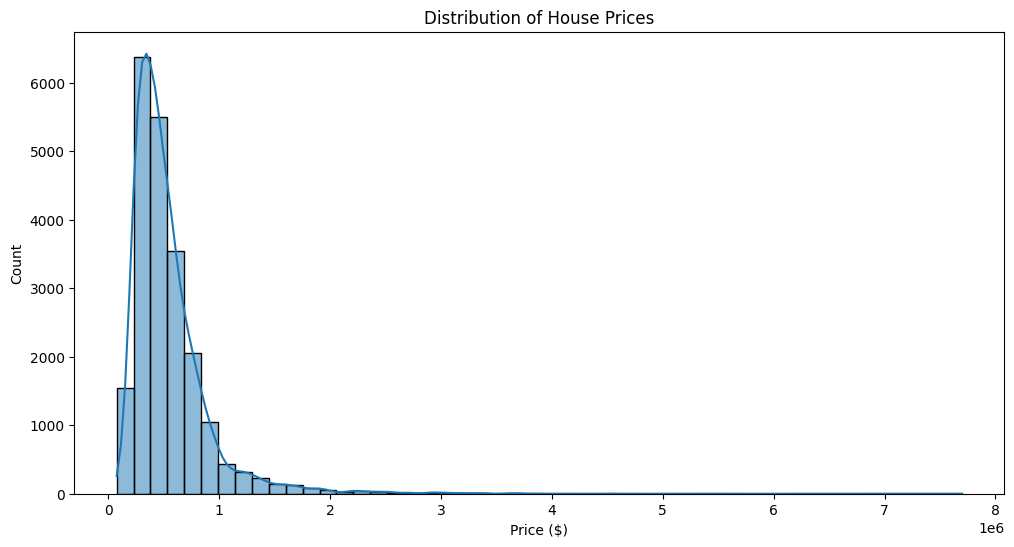

In [9]:
# Plot price distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

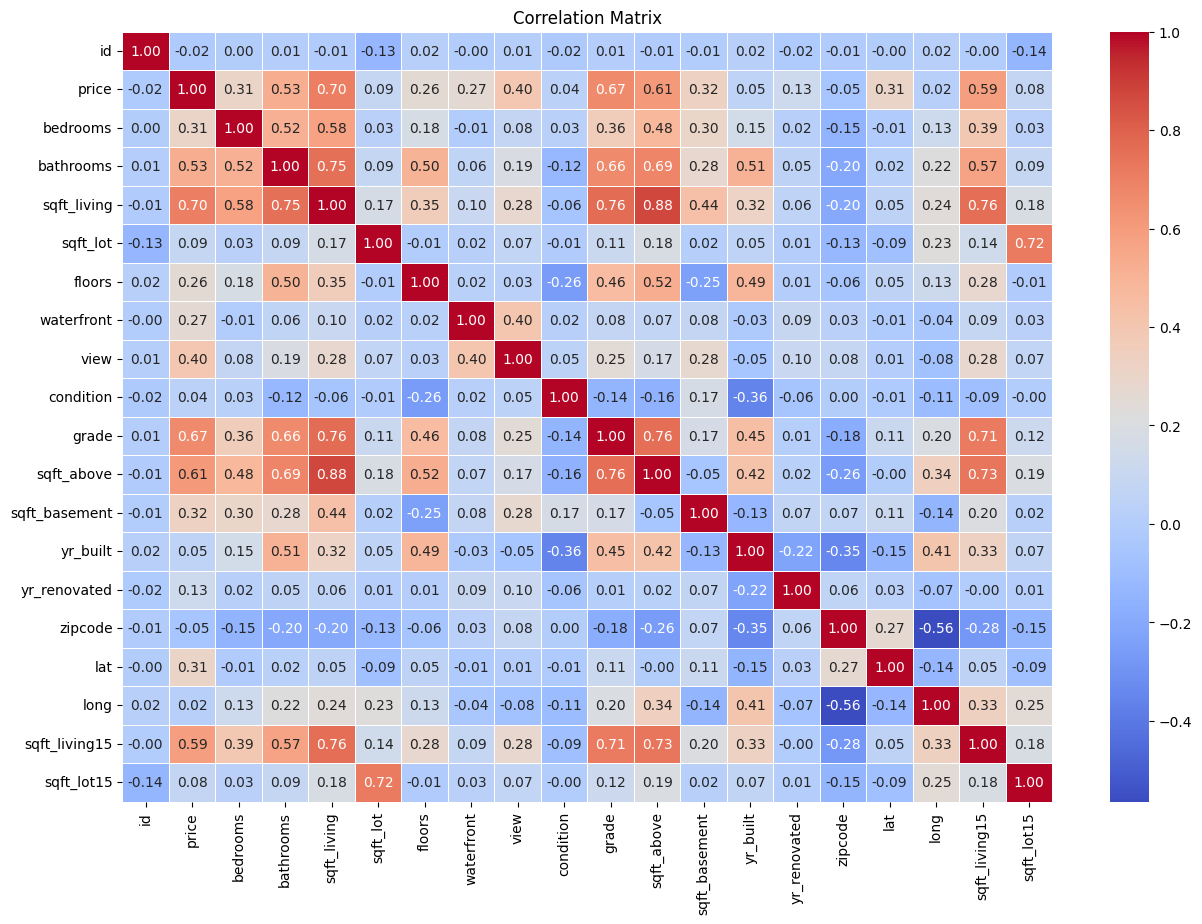

In [10]:
# Correlation matrix
plt.figure(figsize=(15, 10))
correlation = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

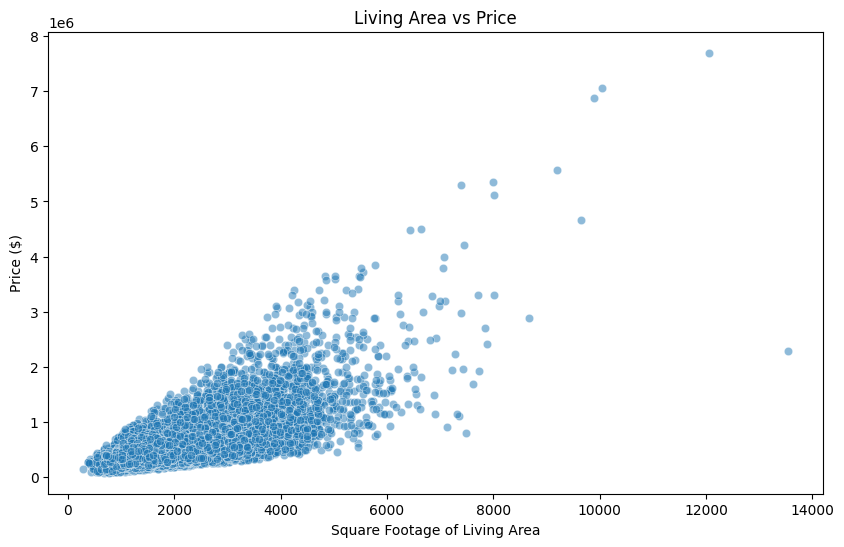

In [11]:
# Scatter plot of sqft_living vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title('Living Area vs Price')
plt.xlabel('Square Footage of Living Area')
plt.ylabel('Price ($)')
plt.show()

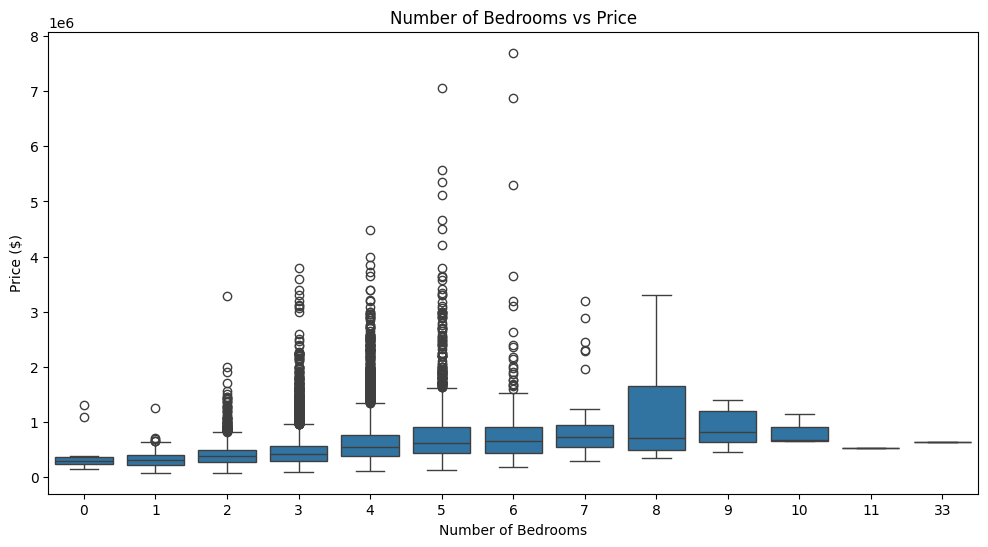

In [12]:
# Box plot of bedrooms vs price
plt.figure(figsize=(12, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price ($)')
plt.show()

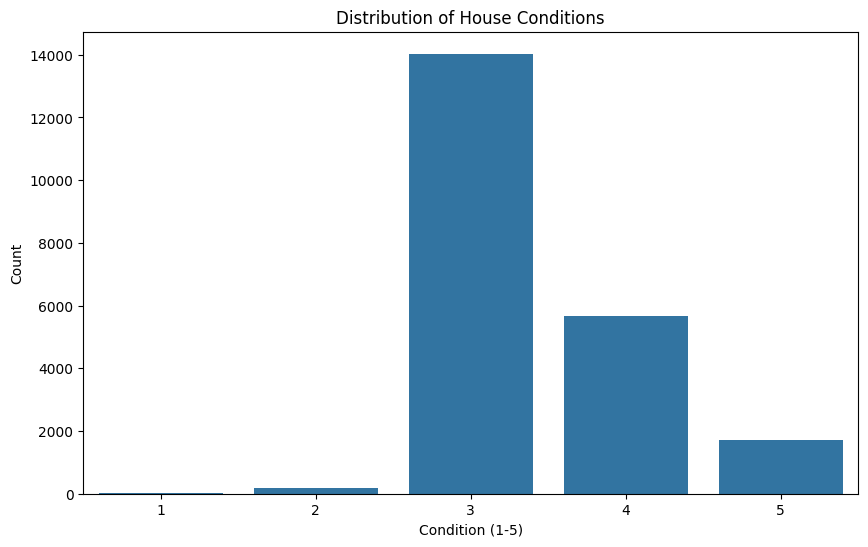

In [13]:
# Count plot of house conditions
plt.figure(figsize=(10, 6))
sns.countplot(x='condition', data=df)
plt.title('Distribution of House Conditions')
plt.xlabel('Condition (1-5)')
plt.ylabel('Count')
plt.show()

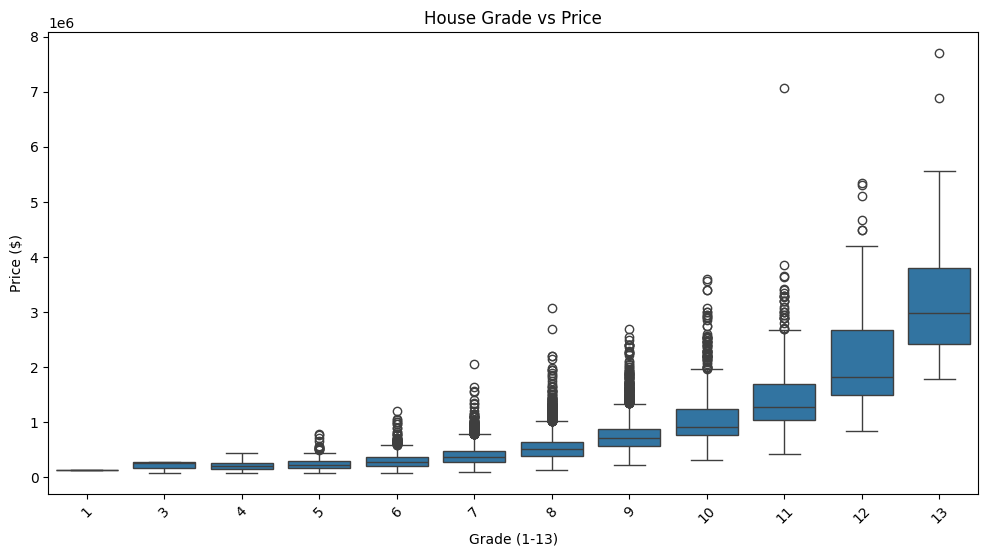

In [14]:
# Box plot of grade vs price
plt.figure(figsize=(12, 6))
sns.boxplot(x='grade', y='price', data=df)
plt.title('House Grade vs Price')
plt.xlabel('Grade (1-13)')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

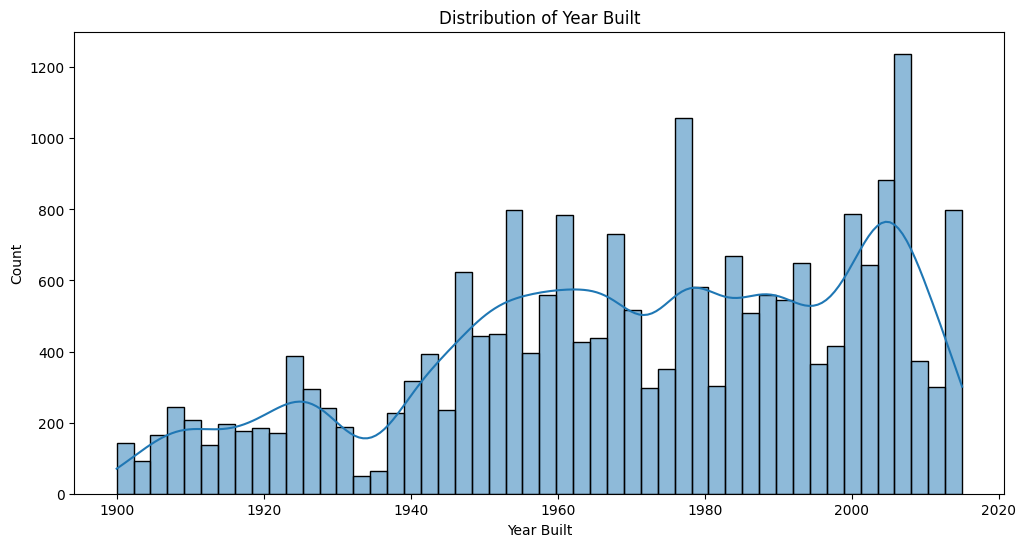

In [15]:
# Distribution of years built
plt.figure(figsize=(12, 6))
sns.histplot(df['yr_built'], bins=50, kde=True)
plt.title('Distribution of Year Built')
plt.xlabel('Year Built')
plt.ylabel('Count')
plt.show()

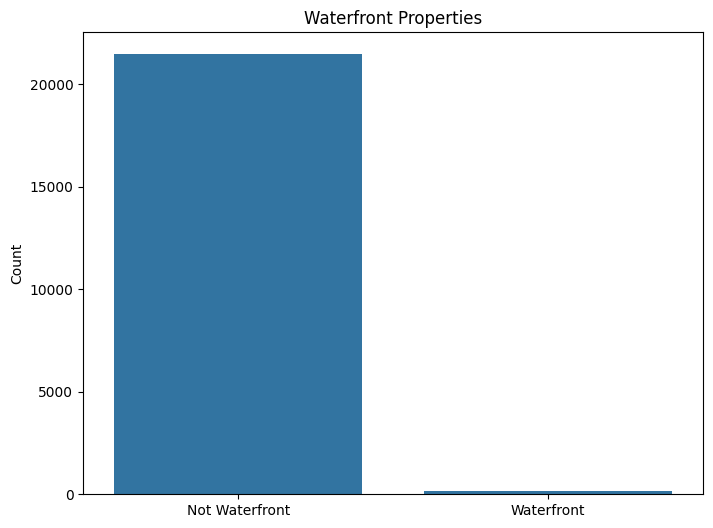

In [16]:
# Count of waterfront properties
plt.figure(figsize=(8, 6))
sns.countplot(x='waterfront', data=df)
plt.title('Waterfront Properties')
plt.xticks([0, 1], ['Not Waterfront', 'Waterfront'])
plt.xlabel('')
plt.ylabel('Count')
plt.show()

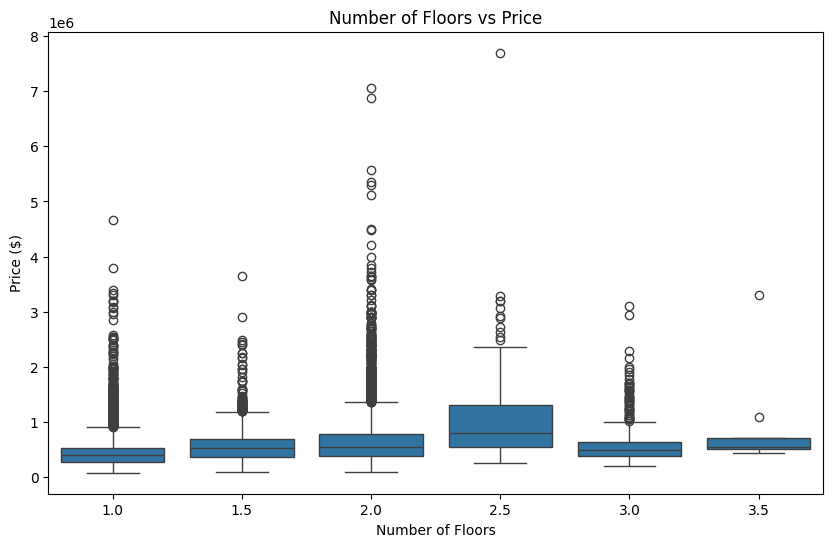

In [17]:
# Box plot of floors vs price
plt.figure(figsize=(10, 6))
sns.boxplot(x='floors', y='price', data=df)
plt.title('Number of Floors vs Price')
plt.xlabel('Number of Floors')
plt.ylabel('Price ($)')
plt.show()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

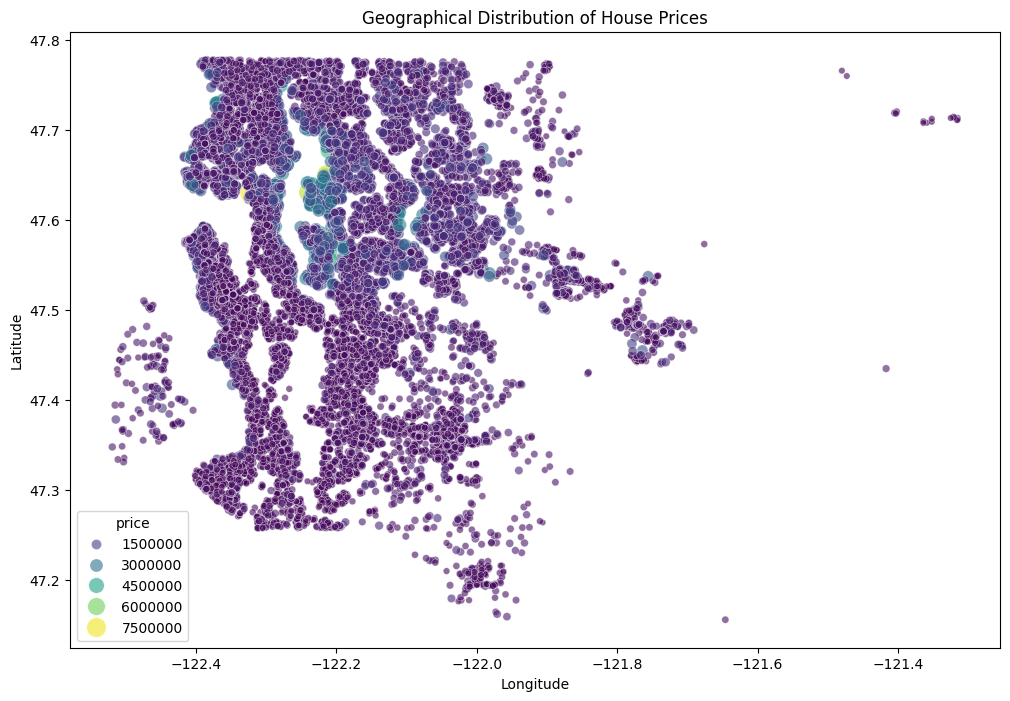

In [19]:
# Scatter plot of location vs price
plt.figure(figsize=(12, 8))
sns.scatterplot(x='long', y='lat', data=df, hue='price', 
                palette='viridis', alpha=0.6, size='price', sizes=(20, 200))
plt.title('Geographical Distribution of House Prices')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Price ($)')
plt.show()

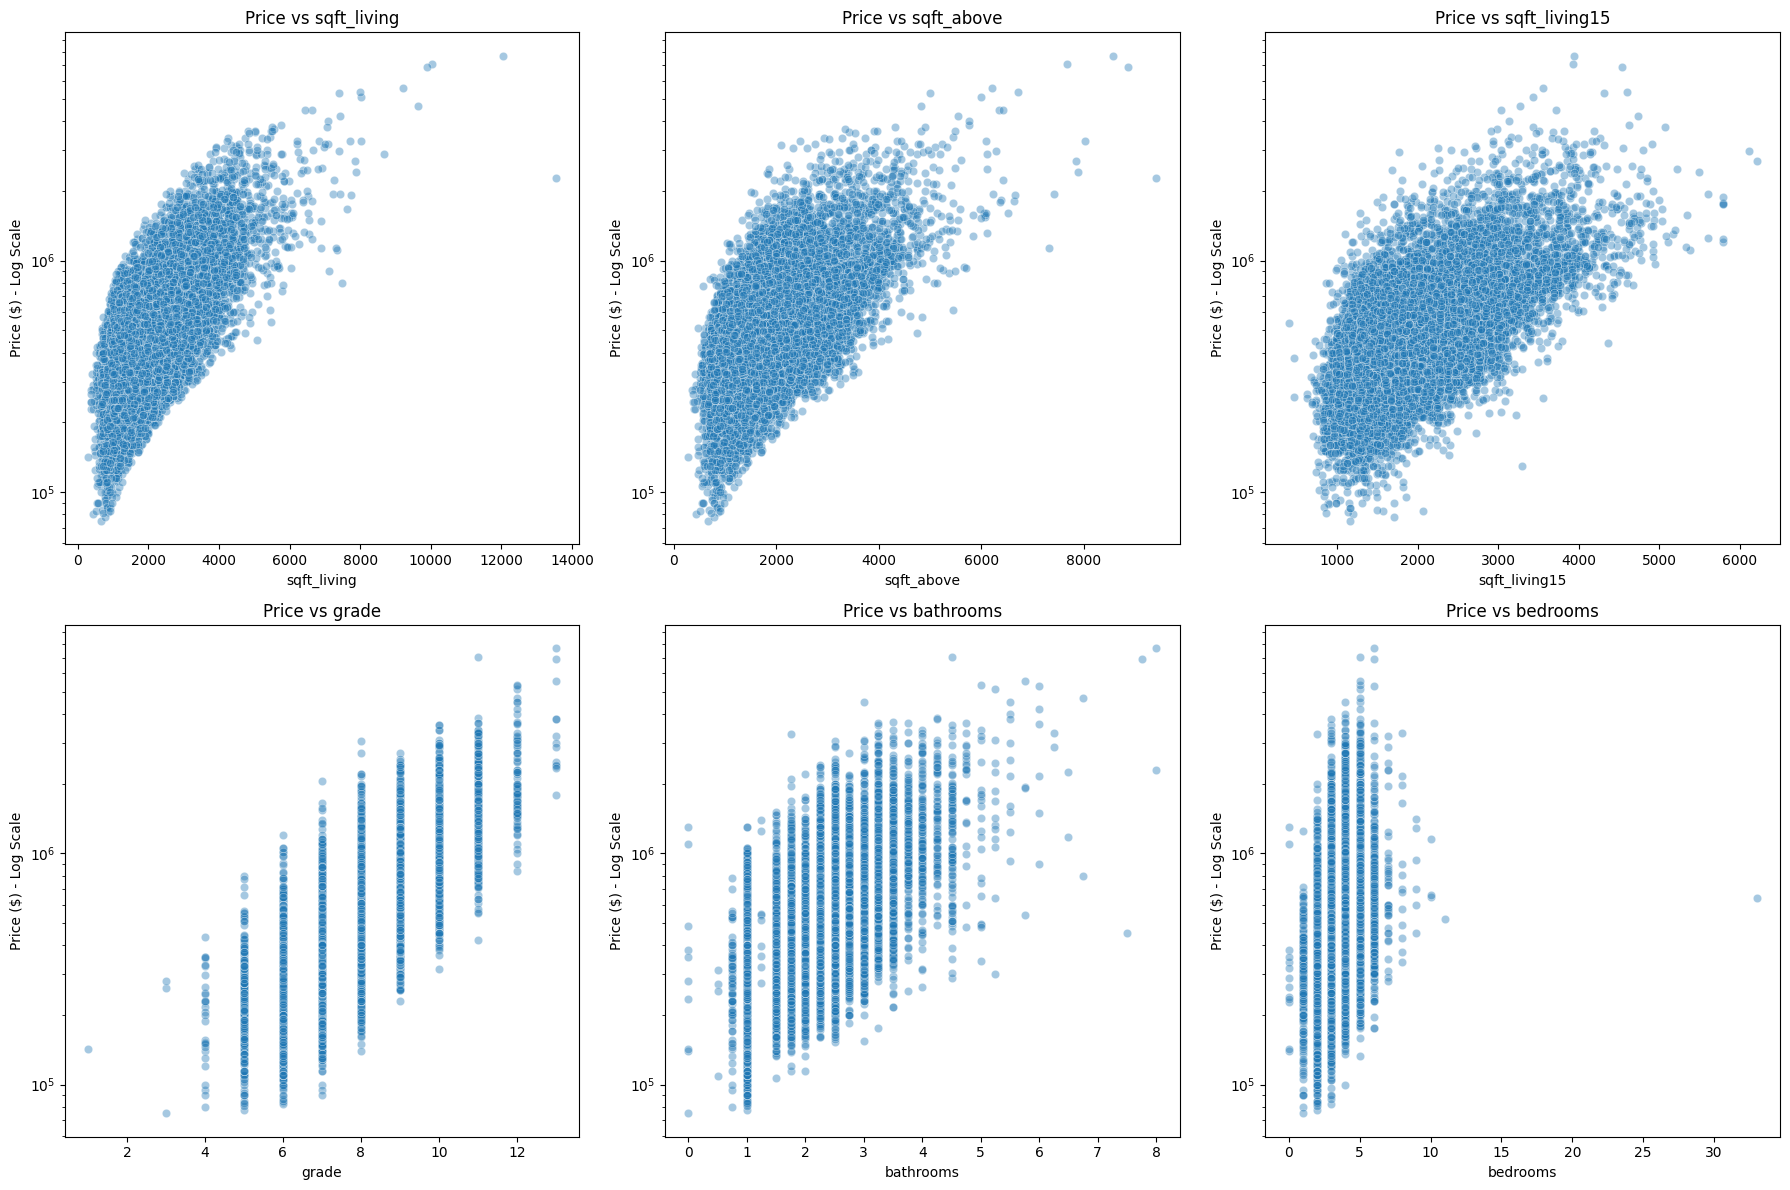

In [21]:
# Scatter plots of price vs key features
key_features = ['sqft_living', 'sqft_above', 'sqft_living15', 'grade', 'bathrooms', 'bedrooms']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='price', data=df, alpha=0.4)
    plt.title(f'Price vs {feature}')
    plt.yscale('log')  # Using log scale for better visualization
    plt.ylabel('Price ($) - Log Scale')
plt.tight_layout()
plt.show()